In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import yfinance as yf
from warnings import filterwarnings
filterwarnings("ignore")

In [106]:
df = yf.download('MSFT', start='2015-01-01')

[*********************100%***********************]  1 of 1 completed


In [107]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2015-01-02,39.998695,40.563262,39.810509,39.913156,27913900
2015-01-05,39.630878,39.973038,39.562445,39.665092,39673900
2015-01-06,39.049206,39.990149,38.955111,39.673650,36447900
2015-01-07,39.545341,39.742084,38.912344,39.331490,29114100
2015-01-08,40.708679,40.845544,39.964479,39.990140,29645200


In [108]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2025-06-16,479.140015,480.690002,475.000000,475.209991,15626100
2025-06-17,478.040009,478.739990,474.079987,475.399994,15414100
2025-06-18,480.239990,481.000000,474.459991,478.000000,17526500
2025-06-20,477.399994,483.459991,476.869995,482.230011,37576200
2025-06-23,486.000000,487.750000,472.510010,478.209991,24813200


In [109]:
# Flatten the columns by keeping only the second level (i.e., drop 'Price')
df.columns = df.columns.droplevel(1)

In [110]:
df.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2015-01-02,39.998695,40.563262,39.810509,39.913156,27913900
2015-01-05,39.630878,39.973038,39.562445,39.665092,39673900
2015-01-06,39.049206,39.990149,38.955111,39.673650,36447900
2015-01-07,39.545341,39.742084,38.912344,39.331490,29114100
2015-01-08,40.708679,40.845544,39.964479,39.990140,29645200


In [111]:
# df.to_excel('Microsoft.xlsx')

In [112]:
stock_data = pd.DataFrame(df['Close'],columns=['Close'])

In [113]:
stock_data.head()

,Close
Date,
2015-01-02,39.998695
2015-01-05,39.630878
2015-01-06,39.049206
2015-01-07,39.545341
2015-01-08,40.708679


# Data cleaning ,Data visualization and EDA 

In [114]:
#Summary statistics
stock_data.describe()

,Close
count,2633.000000
mean,191.795083
std,130.245939
min,34.558338
25%,67.003937
50%,164.628601
75%,289.387939
max,486.000000


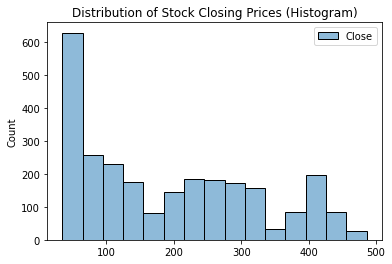

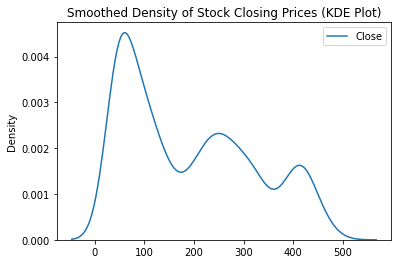

In [115]:
#Visualizations
plt.title('Distribution of Stock Closing Prices (Histogram)')
sns.histplot(stock_data)
plt.show()

plt.title('Smoothed Density of Stock Closing Prices (KDE Plot)')
sns.kdeplot(stock_data)
plt.show()

In [116]:
# Time series decomposition (multiplicative model)
result = seasonal_decompose(stock_data, model='multiplicative', period=365)

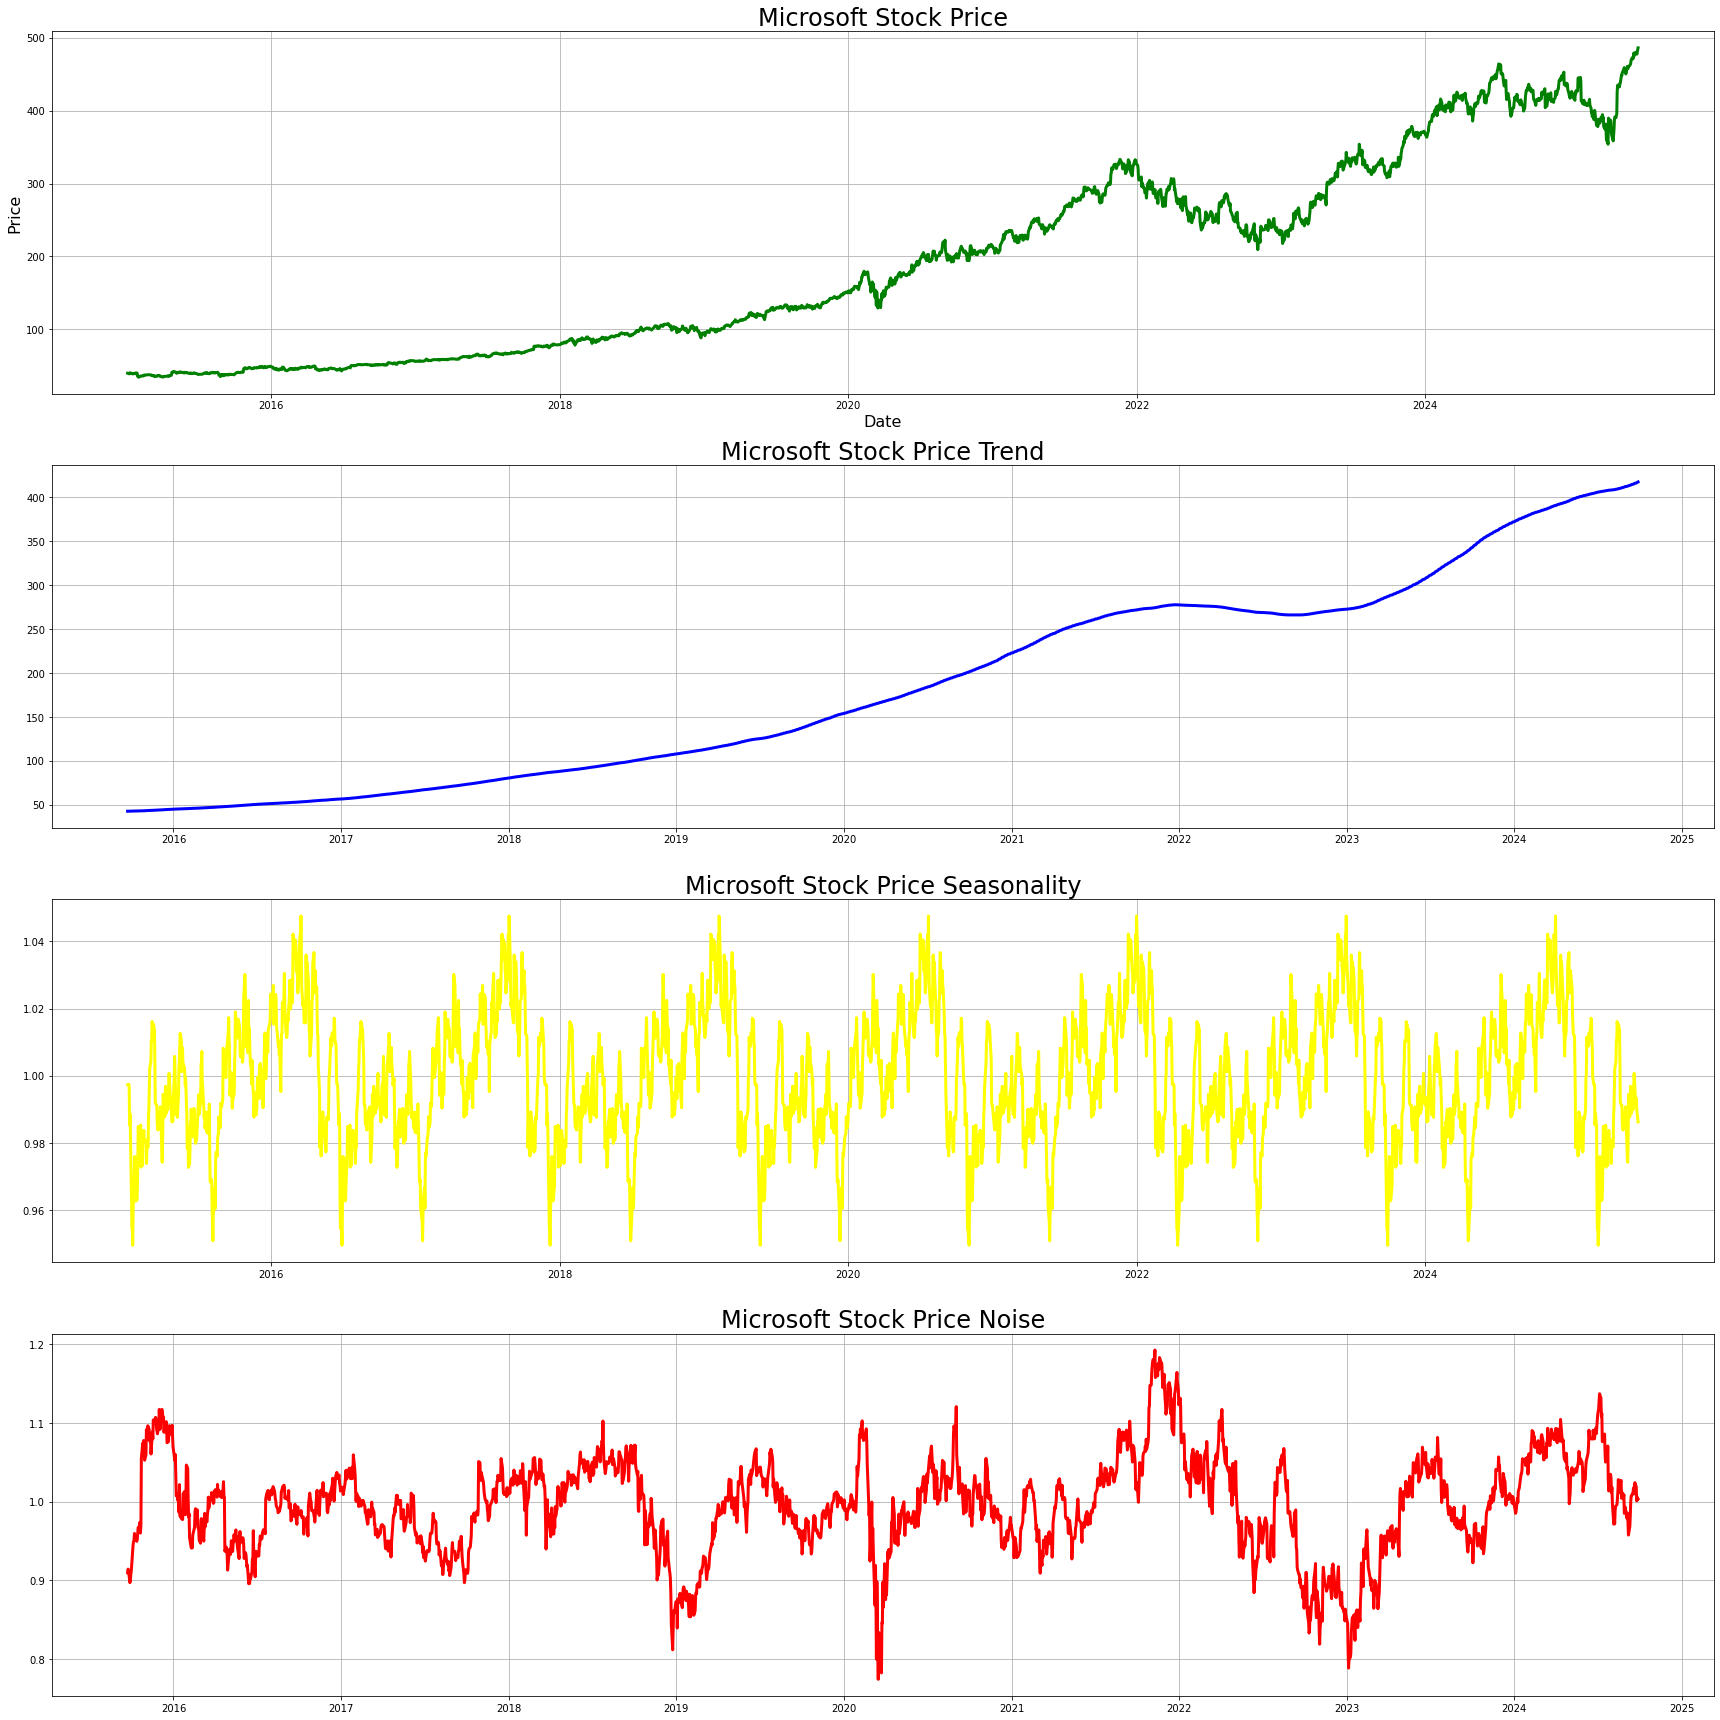

In [117]:
#Visualizing the decomposition
plt.figure(figsize=(24,24))

plt.subplot(4,1,1)
plt.plot(stock_data,color = 'green',linewidth = 3)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Price',fontsize=16)
plt.title('Microsoft Stock Price',fontsize=24)
plt.grid()

plt.subplot(4,1,2)
plt.plot(result.trend,color = 'Blue',linewidth = 3)
plt.title('Microsoft Stock Price Trend',fontsize=24)
plt.grid()

plt.subplot(4,1,3)
plt.plot(result.seasonal,color = 'Yellow',linewidth = 3)
plt.title('Microsoft Stock Price Seasonality',fontsize=24)
plt.grid()

plt.subplot(4,1,4)
plt.plot(result.resid,color = 'Red',linewidth = 3)
plt.title('Microsoft Stock Price Noise',fontsize=24)
plt.grid()

plt.tight_layout()
plt.show()

In [118]:
# Time series decomposition (Additive model)
result = seasonal_decompose(stock_data, model='additive', period=365)

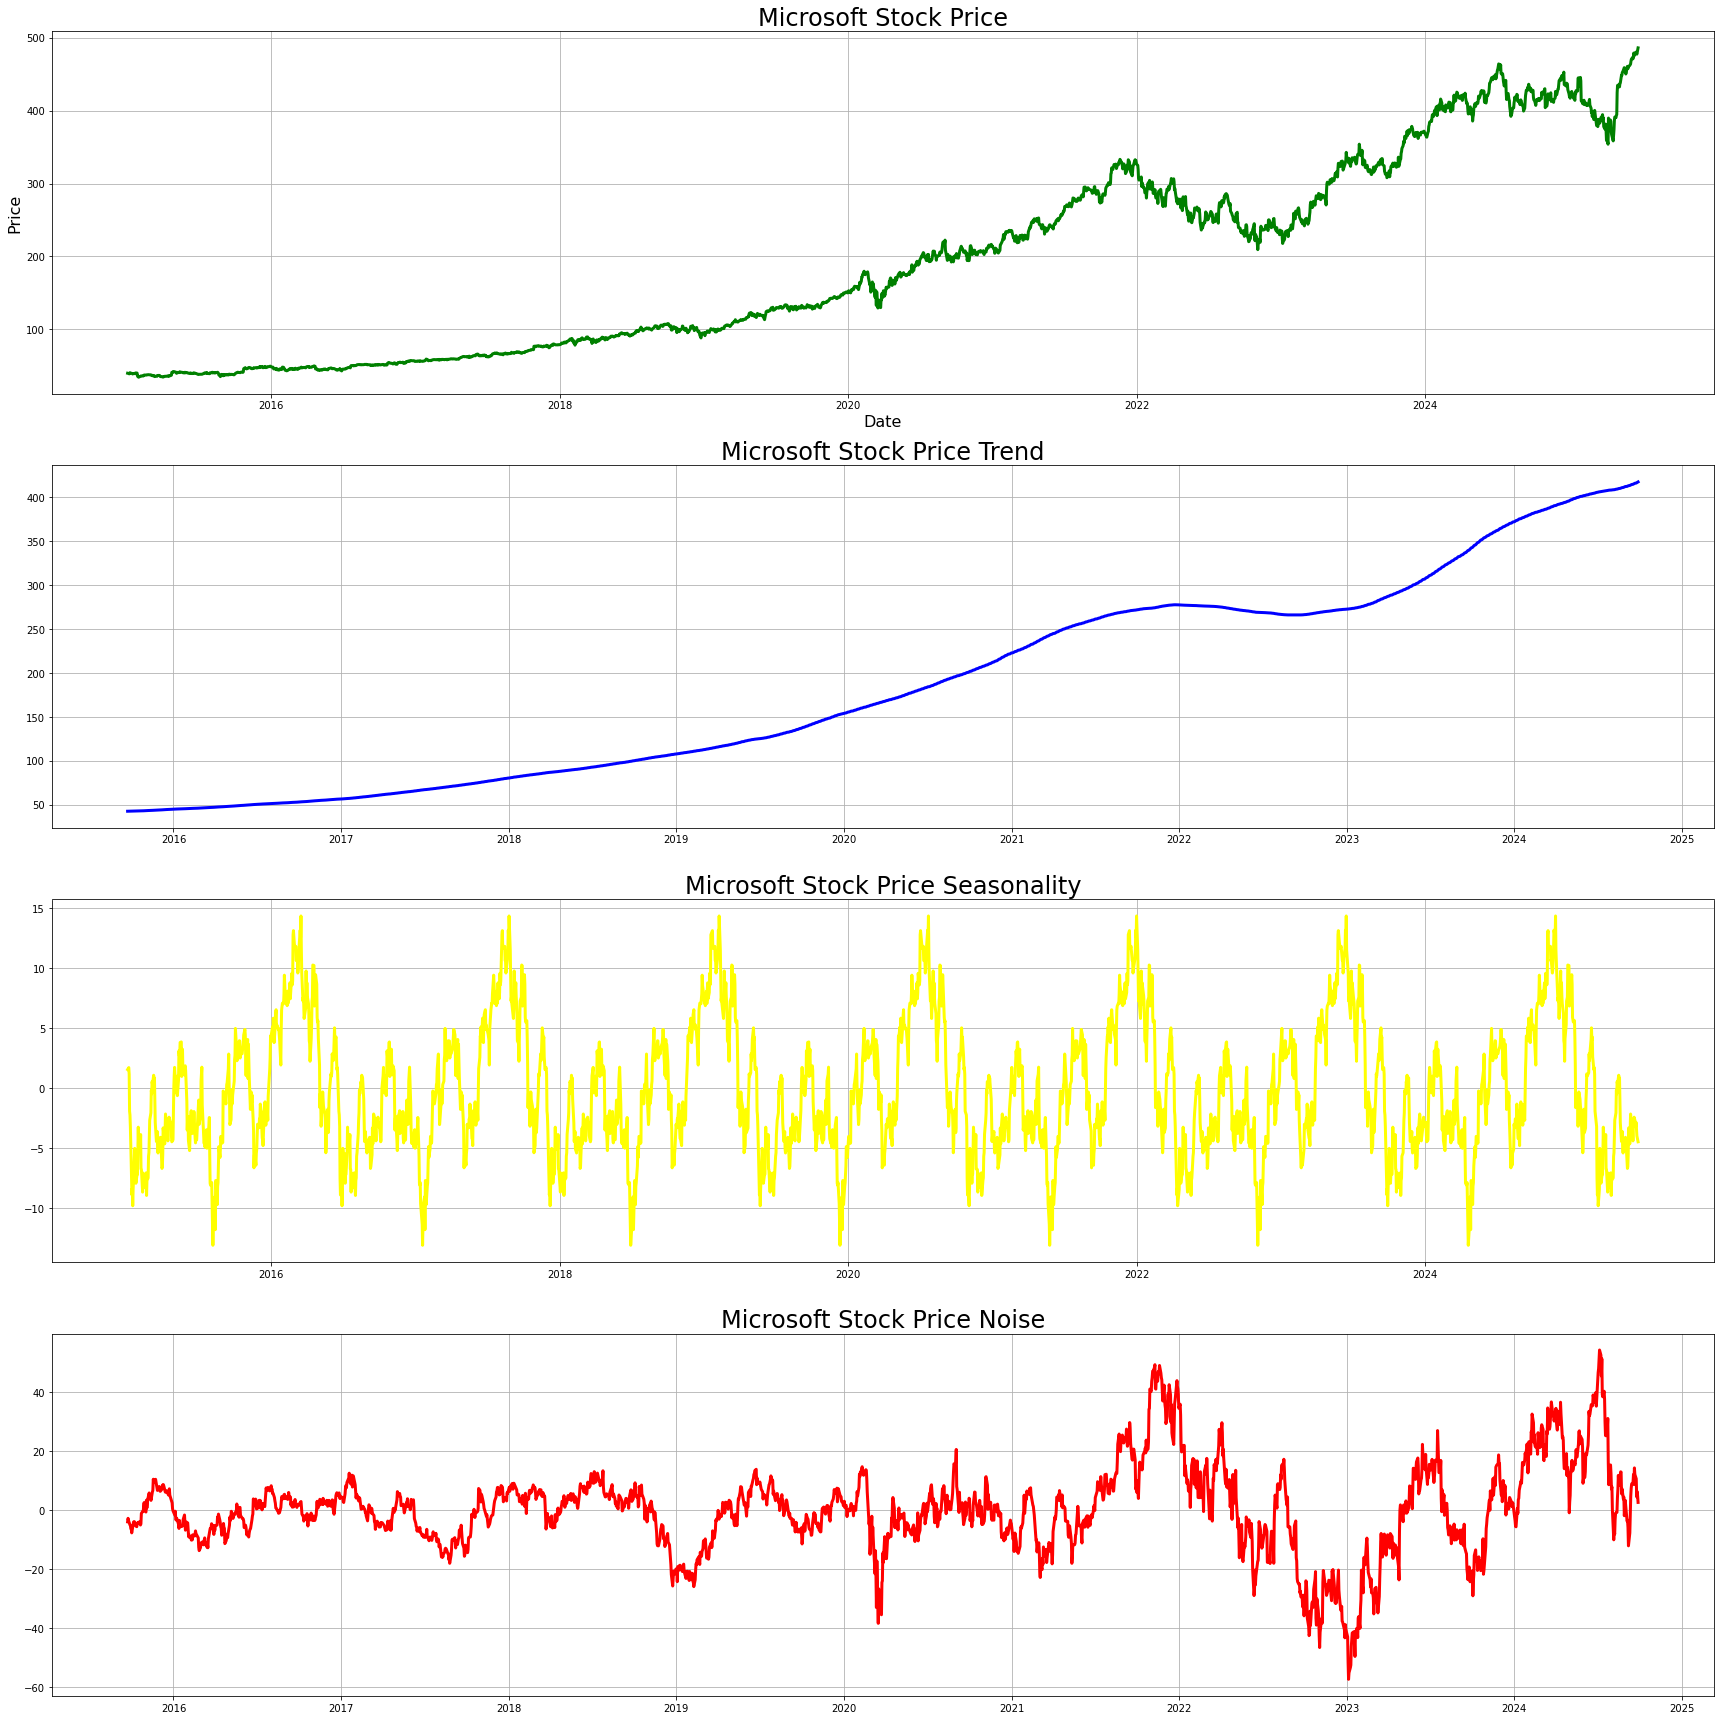

In [119]:
#Visualizing the decomposition
plt.figure(figsize=(24,24))

plt.subplot(4,1,1)
plt.plot(stock_data,color = 'green',linewidth = 3)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Price',fontsize=16)
plt.title('Microsoft Stock Price',fontsize=24)
plt.grid()

plt.subplot(4,1,2)
plt.plot(result.trend,color = 'Blue',linewidth = 3)
plt.title('Microsoft Stock Price Trend',fontsize=24)
plt.grid()

plt.subplot(4,1,3)
plt.plot(result.seasonal,color = 'Yellow',linewidth = 3)
plt.title('Microsoft Stock Price Seasonality',fontsize=24)
plt.grid()

plt.subplot(4,1,4)
plt.plot(result.resid,color = 'Red',linewidth = 3)
plt.title('Microsoft Stock Price Noise',fontsize=24)
plt.grid()

plt.tight_layout()
plt.show()

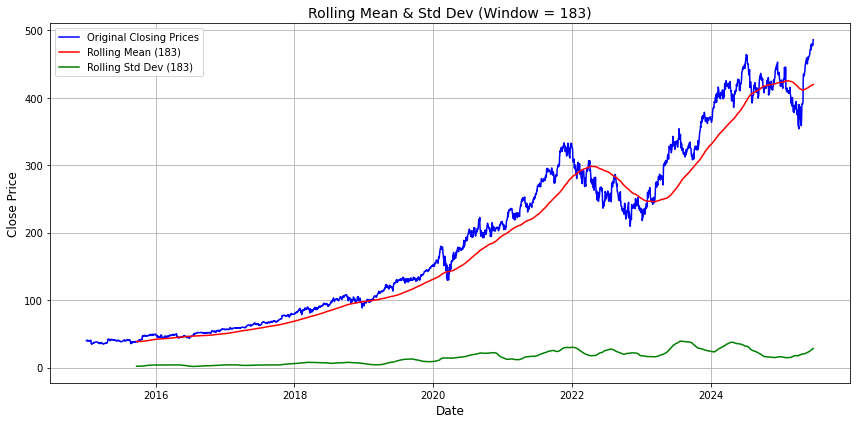

In [120]:
# Rolling mean and standard deviation
window_size = 183
rolling_mean = stock_data['Close'].rolling(window=window_size).mean()
rolling_std = stock_data['Close'].rolling(window=window_size).std()


plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Original Closing Prices', color='blue')
plt.plot(rolling_mean, label=f'Rolling Mean ({window_size})', color='red')
plt.plot(rolling_std, label=f'Rolling Std Dev ({window_size})', color='green')


plt.title(f'Rolling Mean & Std Dev (Window = {window_size})', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [121]:
# Stationarity Check

def Adf_test(data,alpha=0.05):
    val = adfuller(data)[1]
    if val > alpha:
        print(f'P-value is {val.round(4)} which is more than {alpha} therefore data is  Non - Stationary ❌')
    else:
        print(f'P-value is {val.round(4)} which is less than {alpha} therefore data Stationary ✅' )

In [122]:
Adf_test(stock_data)

P-value is 0.9901 which is more than 0.05 therefore data is  Non - Stationary ❌


In [123]:
# Visualizations also suggest that data is non-stationary
# Let's check if first differntiation makes any changes
# stock_data.head().diff().dropna()

Adf_test(stock_data.diff().dropna())

# After doing the first differentation the data becomes stationary

P-value is 0.0 which is less than 0.05 therefore data Stationary ✅


In [124]:
# I am conduction another test for stationarity just to be sure.

def Kpss_test(data,alpha=0.05):
    val = kpss(data)[1]
    if val > alpha:
        print('Stationary ✅')
    else:
        print('Non - Stationary ❌')
        
Kpss_test(stock_data)
Kpss_test(stock_data.diff().dropna())

Non - Stationary ❌
Stationary ✅


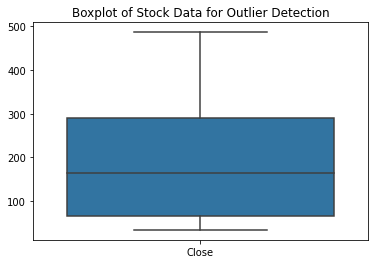

In [125]:
# Outlier detection
plt.title('Boxplot of Stock Data for Outlier Detection')
sns.boxplot(stock_data)
plt.show()

# Visualization shows that we don't have any outliers therefore we don't need to handle them

<Figure size 720x288 with 0 Axes>

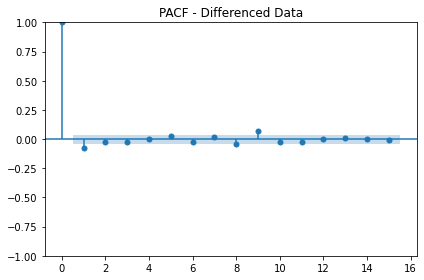

<Figure size 720x288 with 0 Axes>

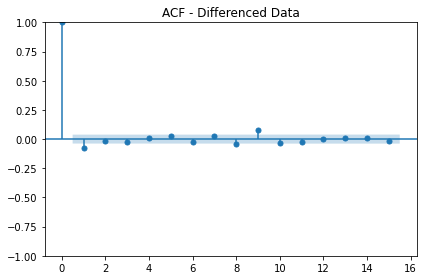

In [126]:
#Generating ACF and PACF plots

diff_data = stock_data.diff().dropna()

plt.figure(figsize=(10, 4))
plot_pacf(diff_data, lags=15)
plt.title("PACF - Differenced Data")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plot_acf(diff_data, lags=15)
plt.title("ACF - Differenced Data")
plt.tight_layout()
plt.show()



# Model building

In [127]:
# Splitting the data into training and testing sets
train_size = int(len(stock_data) * 0.8)
train_data = stock_data[:train_size]

test_size = int(len(stock_data))-train_size
test_data = stock_data[train_size:]

In [128]:
#Print the size
print(f'Shape of data {stock_data.shape}\nSize of training data {train_size}\nSize of testing Data {test_size}')


Shape of data (2633, 1)
Size of training data 2106
Size of testing Data 527


In [129]:
history = [x for x in train_data['Close']]

print(history)

[39.998695373535156, 39.63087844848633, 39.0492057800293, 39.54534149169922, 40.70867919921875, 40.36653137207031, 39.861839294433594, 39.65654373168945, 39.31438064575195, 38.903785705566406, 39.55389404296875, 39.68219757080078, 39.28017044067383, 40.3151969909668, 40.35797882080078, 40.21254348754883, 36.491546630859375, 35.234092712402344, 35.93552780151367, 34.5583381652832, 35.31108856201172, 35.58480453491211, 35.79009246826172, 36.311912536621094, 36.2776985168457, 36.234928131103516, 36.440223693847656, 36.252037048339844, 36.85935974121094, 37.52657699584961, 37.543800354003906, 37.500732421875, 37.47489929199219, 37.785030364990234, 38.03486633300781, 37.98317337036133, 37.89702224731445, 37.95732879638672, 37.776424407958984, 37.80225372314453, 37.285362243652344, 37.0958366394043, 37.138916015625, 36.4927978515625, 36.91492462158203, 36.208499908447266, 36.165428161621094, 35.3383903503418, 35.648536682128906, 35.80359649658203, 35.92421340942383, 36.61339569091797, 36.432

# Arima Model

In [130]:
model = ARIMA(history,order=(1,1,1))
fit = model.fit()

In [131]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2106
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5373.789
Date:                Tue, 24 Jun 2025   AIC                          10753.578
Time:                        13:49:47   BIC                          10770.534
Sample:                             0   HQIC                         10759.788
                               - 2106                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3483      0.101      3.457      0.001       0.151       0.546
ma.L1         -0.4449      0.098     -4.541      0.000      -0.637      -0.253
sigma2         9.6587      0.148     65.072      0.000       9.368       9.950
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              4011.14
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):              50.87   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [132]:
result = fit.forecast(steps=527)

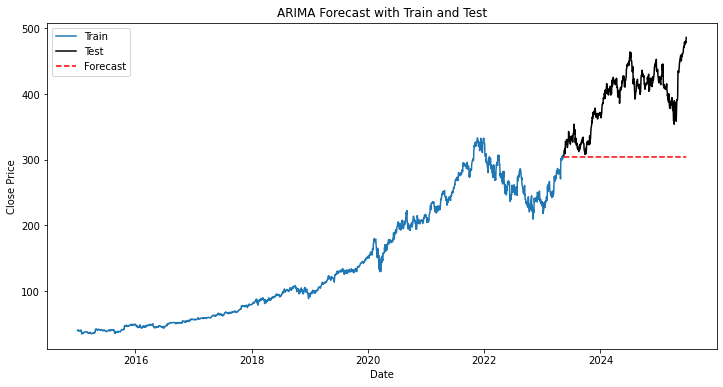

In [133]:

# Use the test_data index directly
forecast_series = pd.Series(result, index=test_data.index)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_data['Close'], label='Train')
plt.plot(test_data['Close'], label='Test', color='black')
plt.plot(forecast_series, label='Forecast', linestyle='--', color='red')
plt.legend()
plt.title('ARIMA Forecast with Train and Test')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [134]:
np.sqrt(mean_squared_error(test_data,result))

98.94889473653262

In [135]:
def train_arima_model(X, y, arima_order):
    history = [x for x in X]
    predictions = []

    for i in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        forecast = model_fit.forecast()
        predictions.append(forecast[0])
        history.append(y[i])

    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse, predictions  


In [136]:
rmse_score, forecasted_values = train_arima_model(train_data['Close'], test_data['Close'], [1,1,1])

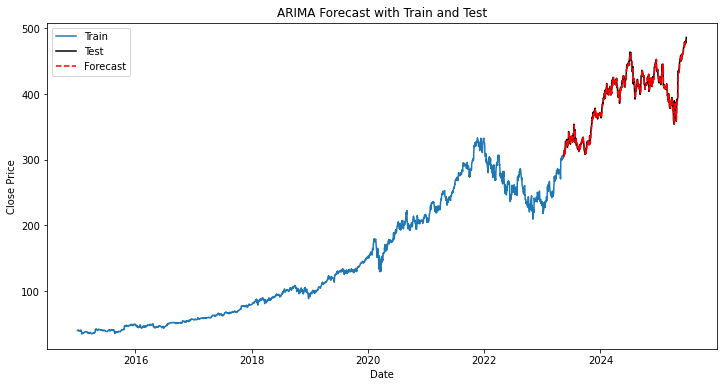

In [137]:
# Use the test_data index directly
forecast_series = pd.Series(forecasted_values, index=test_data.index)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_data['Close'], label='Train')
plt.plot(test_data['Close'], label='Test', color='black')
plt.plot(forecast_series, label='Forecast', linestyle='--', color='red')
plt.legend()
plt.title('ARIMA Forecast with Train and Test')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


In [138]:
def evaluate_models(train_data, test_data, p_values, d_values, q_values):
    best_score, best_cfg = float('inf'), None

    print(f"Evaluating {len(p_values) * len(d_values) * len(q_values)} ARIMA models...")

    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    model = ARIMA(train_data, order=order)
                    model_fit = model.fit()
                    predictions = model_fit.predict(
                        start=len(train_data),
                        end=len(train_data) + len(test_data) - 1,

                    )
                    if isinstance(test_data, pd.Series):
                        predictions.index = test_data.index
                        
                    rmse = np.sqrt(mean_squared_error(test_data, predictions))
                    print(f'ARIMA{order} RMSE: {round(rmse,4)}')
                    
                    if rmse < best_score:
                        best_score = rmse
                        best_cfg = order
                except:
                    continue
                
    print("\n--- Evaluation Complete ---")
    print(f'Best ARIMA{best_cfg} RMSE: {best_score:.4f}')

    return best_cfg

In [139]:
p = range(0,3)
d = range(0,3)
q = range(0,3)

Output= evaluate_models(train_data,test_data,p,d,q)

Evaluating 27 ARIMA models...
ARIMA(0, 0, 0) RMSE: 255.0914
ARIMA(0, 0, 1) RMSE: 255.0091
ARIMA(0, 0, 2) RMSE: 254.9487
ARIMA(0, 1, 0) RMSE: 98.9543
ARIMA(0, 1, 1) RMSE: 98.9861
ARIMA(0, 1, 2) RMSE: 98.9688
ARIMA(0, 2, 0) RMSE: 61.8174
ARIMA(0, 2, 1) RMSE: 63.7274
ARIMA(0, 2, 2) RMSE: 63.183
ARIMA(1, 0, 0) RMSE: 104.9323
ARIMA(1, 0, 1) RMSE: 99.8423
ARIMA(1, 0, 2) RMSE: 110.3896
ARIMA(1, 1, 0) RMSE: 98.9922
ARIMA(1, 1, 1) RMSE: 98.9489
ARIMA(1, 1, 2) RMSE: 99.1145
ARIMA(1, 2, 0) RMSE: 122.1251
ARIMA(1, 2, 1) RMSE: 63.7413
ARIMA(1, 2, 2) RMSE: 63.9166
ARIMA(2, 0, 0) RMSE: 100.223
ARIMA(2, 0, 1) RMSE: 99.2144
ARIMA(2, 0, 2) RMSE: 111.7671
ARIMA(2, 1, 0) RMSE: 98.9811
ARIMA(2, 1, 1) RMSE: 99.0763
ARIMA(2, 1, 2) RMSE: 98.9996
ARIMA(2, 2, 0) RMSE: 252.6652
ARIMA(2, 2, 1) RMSE: 63.9354
ARIMA(2, 2, 2) RMSE: 63.9909

--- Evaluation Complete ---
Best ARIMA(0, 2, 0) RMSE: 61.8174


In [140]:
def forecast_arima_model(train_data, arima_order, n_forecast_steps):
    
    print(f"Training ARIMA{arima_order} model on data of length {len(train_data)}...")

    model = ARIMA(train_data, order=arima_order)
    model_fit = model.fit()
    print(f"Forecasting {n_forecast_steps} steps into the future...")
    forecasts = model_fit.forecast(steps=n_forecast_steps,alpha=0.05)
    return forecasts,model_fit


In [141]:
len(test_data)

527

In [142]:
fc, model_fitted= forecast_arima_model(train_data,[2,2,2],527)


Training ARIMA[2, 2, 2] model on data of length 2106...
Forecasting 527 steps into the future...


In [143]:
# fc_index = pd.date_range(start=test_data.index[0], periods=1050, freq=test_data.index.freq)
fc.index = test_data.index


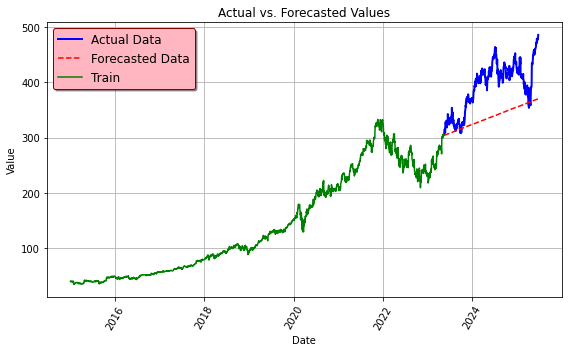

In [144]:
plt.figure(figsize=(8,5))
plt.plot(test_data, label='Actual Data', color='blue', linewidth=2)
plt.plot(fc, label='Forecasted Data', color='red', linestyle='--', linewidth=1.5)
plt.plot(train_data['Close'], label='Train',color='Green')
plt.xticks(rotation=60)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Forecasted Values')

plt.legend(fontsize = 12, shadow=True,facecolor = 'LightPink',edgecolor='maroon')
plt.grid()
plt.tight_layout()
plt.show()

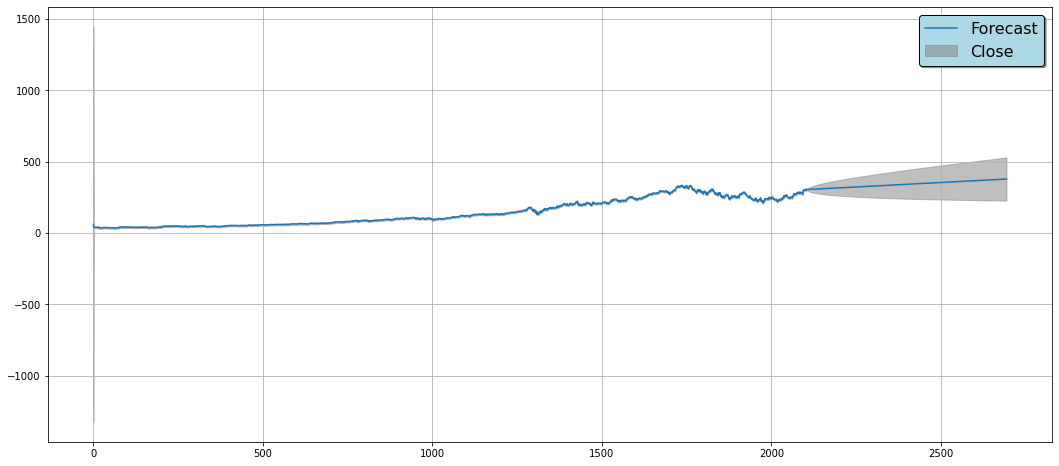

In [145]:
from statsmodels.graphics.tsaplots import plot_predict
plt.figure(figsize=(18, 8))
ax = plt.subplot(1, 1, 1)

plot_predict(result=model_fitted, start=1, end=len(stock_data)+60, ax=ax)
plt.grid()

plt.legend(['Forecast', 'Close', '95% confidence interval'],fontsize=16, shadow=True, facecolor='lightblue', edgecolor='black')

plt.show()


# Sarima Model

In [146]:
# Fit SARIMA model 
model = SARIMAX(train_data, order=(1,1,1), seasonal_order=(1,1,1,30))
model_fit = model.fit()


forecast = model_fit.forecast(steps=527)
forecast.index = test_data.index


In [147]:
rmse = np.sqrt(mean_squared_error(test_data,forecast))
print(rmse)

61.43139261795198


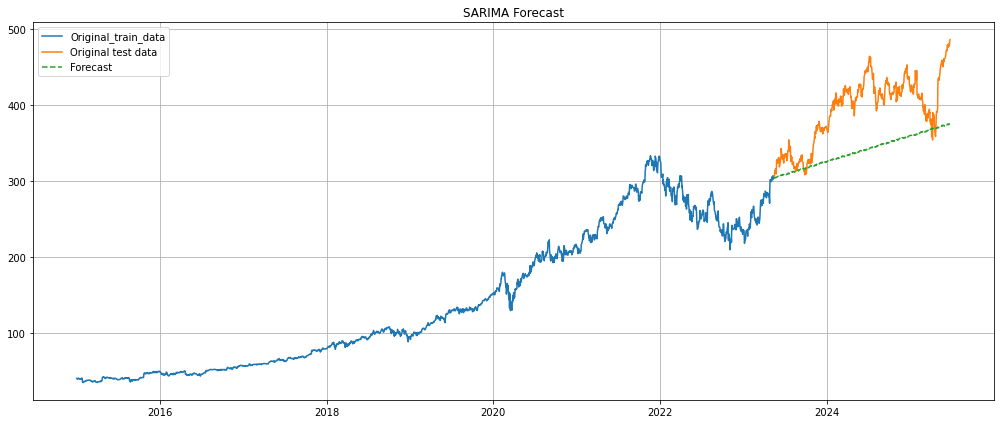

In [148]:

plt.figure(figsize=(14,6))
plt.plot(train_data, label='Original_train_data')
plt.plot(test_data, label='Original test data')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('SARIMA Forecast')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [149]:
# Define endogenous and exogenous variables
y = df['Close']
X = df[['Open', 'High', 'Low', 'Volume']]

# Define train/test split index
split_index = int(len(stock_data) * 0.8)

# Split data
y_train, y_test = y[:split_index], y[split_index:]
X_train, X_test = X[:split_index], X[split_index:]


print(f"Training samples: {len(y_train)}")
print(f"Testing samples: {len(y_test)}")


Training samples: 2106
Testing samples: 527


# SARIMAX model

In [150]:
# Fit SARIMAX model
model = SARIMAX(y_train, exog=X_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 30))
model_fit = model.fit()


In [151]:

forecast = model_fit.forecast(steps=527, exog=X_test)
forecast.index=X_test.index

In [152]:
rmse = np.sqrt(mean_squared_error(y_test,forecast))
print(rmse)

18.140931222929215


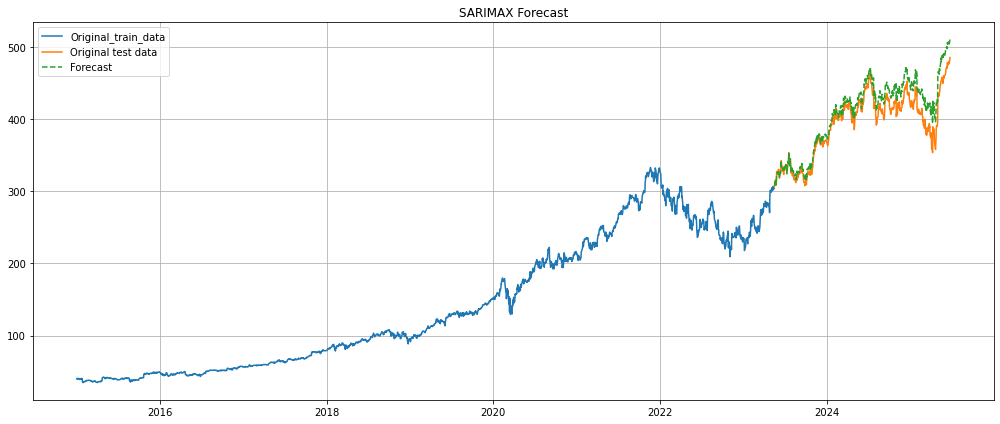

In [153]:
plt.figure(figsize=(14,6))
plt.plot(y_train, label='Original_train_data')
plt.plot(y_test, label='Original test data')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('SARIMAX Forecast')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
